# Modelos predefinidos
---
Vamos a usar un modelo predefinido para hacer cosas con él

In [27]:
import cv2, numpy as np, tensorflow as tf, matplotlib.pyplot as plt, urllib.request

In [28]:
def imshow(img):
    fig, ax = plt.subplots(1,1, figsize = (8,8))
    ax.imshow(img)

In [29]:
path_img = 'https://media.tenor.com/3Cs_AKNDxRwAAAAM/gato-lengua.gif' #Gato
path_img2 = 'https://www.shutterstock.com/image-photo/funny-hungry-pets-eating-dog-600nw-2473646027.jpg' #Perro y gato

In [30]:
#Convertimos la imagen obtenida desde internet a una imagen adaptada a lo que vamos a hacer
req = urllib.request.urlopen(path_img2)
arr = np.asarray(bytearray(req.read()), dtype = np.uint8)
img = cv2.imdecode(arr, -1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224))

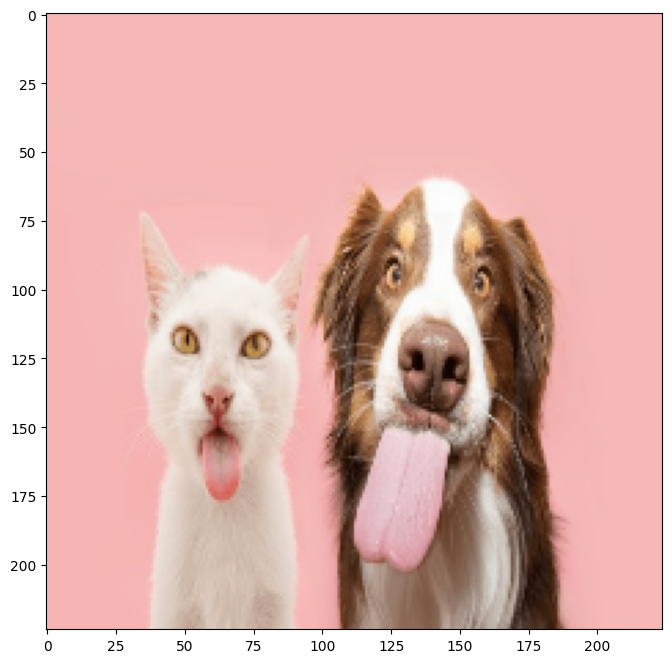

In [31]:
imshow(img)

In [32]:
'''
Aquí se carga un modelo preentrenado, el vgg16.
Le carga los pesos ya entrenados del dataset ImageNet
que contiene más de un millón de imágenes clasificadas
en 1000 categorías.
Con include_top = True indicamos que queremos usarla para
clasificar directamente imágenes como perro, gato, coche, etc.
Si include_top = False usaríamos vgg16 como extractor de características.
'''
model = tf.keras.applications.vgg16.VGG16(weights = "imagenet", include_top = True)

In [33]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
img.shape #La queremos como (1, 224, 224, 3)

(224, 224, 3)

In [35]:
#La reshapeamos
img_tensor = np.array([img])
img_tensor.shape

(1, 224, 224, 3)

In [36]:
np.argmax(model.predict(img_tensor)) #Predice que es un gato (en la posición 284)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step


217

¿Cómo podemos saber que patrones tiene en cuenta el sistema para lograr una clasificación?
¿En qué se fija?
Estas son unas preguntas muy importantes que debemos tener en cuenta para saber si nuestro agente
de ia está funcionando o no.
Para ello se usa GRAD-CAM (Gradient Class Activation Map)
Consiste en mostrar los píxeles que mas contribuyeron para que se diera determinada clasificación

In [37]:
!pip install tf_explain

In [40]:
from tf_explain.core.grad_cam import GradCAM
#El formato que requiere el gradCam es una lista de (imagen, None)
data = ([img], None)

#Calculamos la clase predicha por el modelo
predict_class_index = np.argmax(model.predict(img_tensor)) #284 Gato #217 Perro
#Creamos el gradCAM
explainer = GradCAM()

#Hacemos que el heatMsp se convierta en un mapa de calor pasandole los datos, el modelo el índice y la última capa de convolución
heatMap = explainer.explain(data, model, class_index = predict_class_index, layer_name = 'block5_conv3')

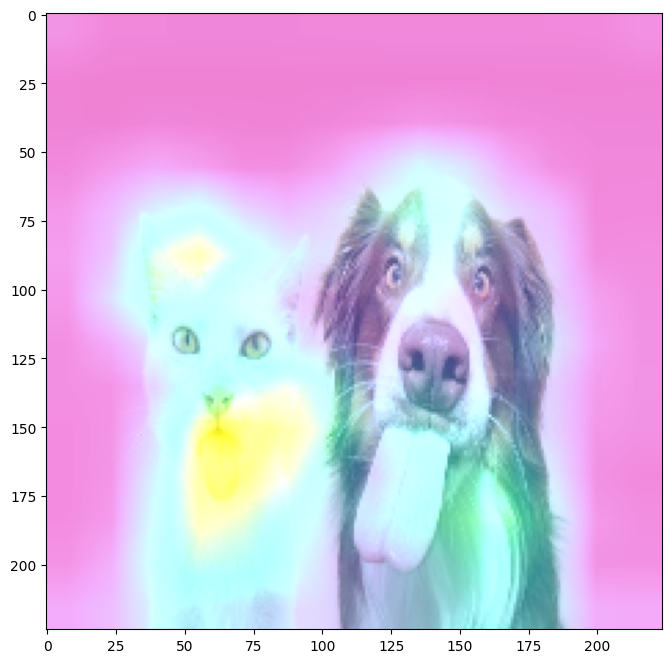

In [41]:
imshow(heatMap)